# Final Project Submission

Please fill out:
* Student name: Elizabeth Webster
* Student pace: Flex
* Scheduled project review date/time: 12/21/21 10:30 PST
* Instructor name: Ahbineet Kulkarni
* Blog Post URL: https://medium.com/@eaw524/from-chef-to-data-scientist-the-ultimate-imposter-syndrome-64458f67e90d

# Project Overview
Microsoft is hoping to enter the entertainment industry by making their first movie.  However, they have no idea how to go about this project.  In this notebook, I will research movie genres, release dates, and directors in order to make suggestions to Microsoft on how to proceed on their project.

## To start, we will import pandas, numpy, matplotlib, seaborn, os, and glob.  Then we will import the data tables that we will be using for our analysis.

In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob

In [2]:
# Import the related data
csv_files = glob("./zippedData/*.csv.gz")
csv_files

csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(
        ".csv", "").replace(".", "_") 
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

# Find the Most Profitable Genres
We will first be looking into different movie genres and how profitable they were.  We will do this two different ways. First will be by genre profit (Worldwide Gross less Production Cost).  The second will be by return on investment (Worldwide Gross as a percentage of Production Cost).

## Genre vs Profit
### Creating the DataFrames
First we will take a look at how the genres stack up in regards to profit.  For this example, profit refers to Worldwide Gross less Production Budget.  We will begin by importing the imbd title basics table and the tn movie budgets table.

In [3]:
#Create separate DataFrames
title_basics_df = csv_files_dict["imdb_title_basics_gz"]
print("Length:", len(title_basics_df))
title_basics_df.head()

Length: 146144


,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
movie_budgets_df = csv_files_dict["tn_movie_budgets_gz"]
print("Length:", len(movie_budgets_df))
movie_budgets_df.head()

Length: 5782


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Joining the Tables
In order to access all the data we will need for profits by genre, we will need to merge the two tables.  We will be using a merge instead of a join because the we are not combining the tables on their index.

In [5]:
#Merge the DataFrames
genre_and_profit_df = title_basics_df.merge(movie_budgets_df,
                                            how='inner',
                                            left_on='primary_title',
                                            right_on='movie')
genre_and_profit_df

,primary_title,original_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy","Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy","Aug 18, 1995",Mortal Kombat,"$20,000,000","$70,433,227","$122,133,227"
2,The Overnight,The Overnight,2010,88.0,NaN,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
3,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery","Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
4,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance","Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...
3810,Fuel,Fuel,2018,NaN,"Documentary,Sport","Nov 14, 2008",Fuel,"$2,500,000","$174,255","$174,255"
3811,Diner,Diner,2019,NaN,Crime,"Apr 2, 1982",Diner,"$5,000,000","$12,592,907","$12,592,907"
3812,Traitor,Traitor,2015,110.0,"Action,Drama,Romance","Aug 27, 2008",Traitor,"$22,000,000","$23,530,831","$27,882,226"
3813,Ray,Ray,2018,111.0,Crime,"Oct 29, 2004",Ray,"$40,000,000","$75,305,995","$124,823,094"


### Cleaning the Data
Once the two tables are merged into one DataFrame, we will clean it up so we are only dealing with the data we need.  This will include checking for duplicates, converting certain columns to integers, and using aggregate functions to create a new column.

In [6]:
#Check for duplicates
genre_and_profit_df.duplicated().value_counts

<bound method IndexOpsMixin.value_counts of 0       False
1       False
2       False
3       False
4       False
        ...  
3810    False
3811    False
3812    False
3813    False
3814    False
Length: 3815, dtype: bool>

In [7]:
#Clean production budget and worldwide gross and convert to integers
genre_and_profit_df['production_budget'] = genre_and_profit_df[
    'production_budget'].str.replace("$", "").str.replace(",", "").astype(int)
genre_and_profit_df['worldwide_gross'] = genre_and_profit_df[
    'worldwide_gross'].str.replace("$", "").str.replace(",", "").astype(int)

In [8]:
#Create a profit column
genre_and_profit_df['movie_profit'] = genre_and_profit_df[
    'worldwide_gross'] - genre_and_profit_df['production_budget']

### Separating out Genres
Currently, our genre column can include up to three different genres.  In order to find profits for each different genre, we will need to separate these values into their own DataFrames and then join them back together.

In [9]:
#Separate out individual genres for each movie
genre_and_profit_df[['genre1','genre2','genre3']] = genre_and_profit_df[
                                                    'genres'].str.split(
                                                    ",", expand=True)

In [10]:
#Create DataFrames with genre averages
genre1_df = genre_and_profit_df.groupby('genre1').mean()
genre2_df = genre_and_profit_df.groupby('genre2').mean()
genre3_df = genre_and_profit_df.groupby('genre3').mean()

In [11]:
#Join the genre DataFrames
two_joined_df = genre1_df.join(genre2_df, how='outer', rsuffix='_2')

In [12]:
three_joined_df = two_joined_df.join(genre3_df, how='outer', rsuffix='_3')

### Cleaning the New DataFrame
Now that we have the data we are needing, we can perform aggregate functions on it in order to find the average profit for each genre.

In [13]:
#Create a DataFrame with only the necessary columns
profits_df = three_joined_df.filter(['movie_profit', 
                                     'movie_profit_2', 
                                     'movie_profit_3'])
profits_df

,movie_profit,movie_profit_2,movie_profit_3
Action,1.140820e+08,NaN,NaN
Adventure,1.562744e+08,2.348677e+08,NaN
Animation,1.169603e+08,2.452123e+08,3.222576e+08
Biography,4.086081e+07,4.840822e+07,1.170822e+08
Comedy,3.574767e+07,5.909769e+07,2.506183e+08
Crime,2.729400e+07,4.103347e+07,5.201195e+07
Documentary,3.729862e+07,4.655366e+07,1.628089e+07
Drama,2.888918e+07,4.217389e+07,4.656813e+07
Family,2.605513e+08,7.712496e+07,1.015828e+08
Fantasy,1.762237e+08,1.231921e+08,1.678300e+08


In [14]:
#Create a column with overall averages
profits_df['avg_profit'] = profits_df.mean(axis=1)

In [15]:
#Sort DataFrame by overall averages descending
profits_df = profits_df.sort_values('avg_profit', ascending=False)
profits_df

,movie_profit,movie_profit_2,movie_profit_3,avg_profit
Animation,1.169603e+08,2.452123e+08,3.222576e+08,2.281434e+08
Adventure,1.562744e+08,2.348677e+08,NaN,1.955710e+08
Musical,1.875732e+08,1.000713e+08,2.290784e+08,1.722410e+08
Fantasy,1.762237e+08,1.231921e+08,1.678300e+08,1.557486e+08
Family,2.605513e+08,7.712496e+07,1.015828e+08,1.464197e+08
Comedy,3.574767e+07,5.909769e+07,2.506183e+08,1.151545e+08
Action,1.140820e+08,NaN,NaN,1.140820e+08
Sci-Fi,5.628631e+07,6.881068e+07,2.088337e+08,1.113102e+08
Biography,4.086081e+07,4.840822e+07,1.170822e+08,6.878374e+07
Music,8.570950e+07,3.377460e+07,6.391598e+07,6.113336e+07


### Representing our Data in a Plot
We will use a bar plot to represent our findings.

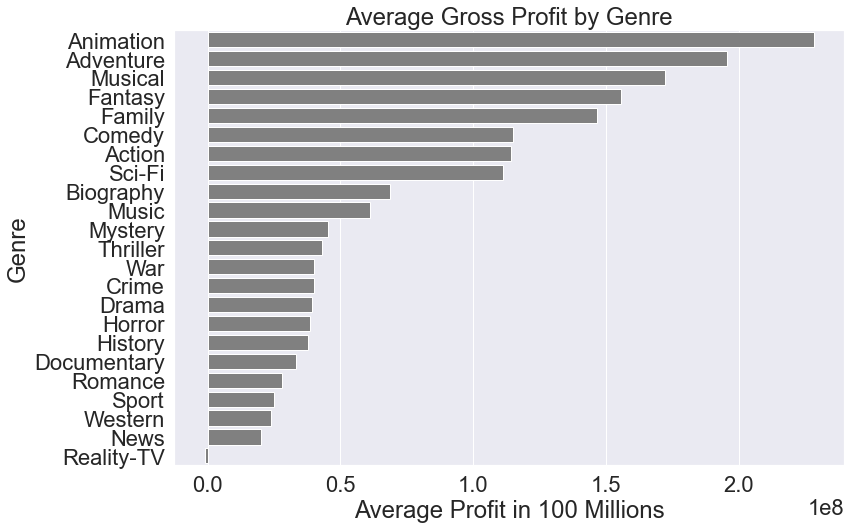

In [19]:
#Create a barplot to show the relationship between genre and average profit
sns.set(rc={'figure.figsize':(12,8)},
        font_scale=2)
p = sns.barplot(data = profits_df, 
                x='avg_profit', 
                y=profits_df.index,
                color='grey')
p.set(xlabel = "Average Profit in 100 Millions", 
      ylabel = "Genre", 
      title = "Average Gross Profit by Genre");

### Findings
This graph shows us that the top 5 genres that make the highest profit are Animation, Adventure, Musicals, Fantasy, and Family.  We do need to keep in mind with this graph that movies can have more than one genre.

## Genre vs ROI
### Using a DataFrame from Above
Next we will be looking into how genres perform in regards to their return on investment. Because we are still using genre, worldwide gross, and production budget, we can use the genre and profit DataFrame that we have already created.

In [20]:
#We can start this process by using a DataFrame that we created above
genre_and_profit_df

,primary_title,original_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_profit,genre1,genre2,genre3
0,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy","Dec 31, 2012",Foodfight!,45000000,$0,73706,-44926294,Action,Animation,Comedy
1,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy","Aug 18, 1995",Mortal Kombat,20000000,"$70,433,227",122133227,102133227,Action,Adventure,Fantasy
2,The Overnight,The Overnight,2010,88.0,NaN,"Jun 19, 2015",The Overnight,200000,"$1,109,808",1165996,965996,NaN,NaN,NaN
3,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery","Jun 19, 2015",The Overnight,200000,"$1,109,808",1165996,965996,Comedy,Mystery,None
4,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance","Mar 22, 2013",On the Road,25000000,"$720,828",9313302,-15686698,Adventure,Drama,Romance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,Fuel,Fuel,2018,NaN,"Documentary,Sport","Nov 14, 2008",Fuel,2500000,"$174,255",174255,-2325745,Documentary,Sport,None
3811,Diner,Diner,2019,NaN,Crime,"Apr 2, 1982",Diner,5000000,"$12,592,907",12592907,7592907,Crime,None,None
3812,Traitor,Traitor,2015,110.0,"Action,Drama,Romance","Aug 27, 2008",Traitor,22000000,"$23,530,831",27882226,5882226,Action,Drama,Romance
3813,Ray,Ray,2018,111.0,Crime,"Oct 29, 2004",Ray,40000000,"$75,305,995",124823094,84823094,Crime,None,None


### Streamlining our Sample Size
In this example, we will be looking at revenue (Worldwide Gross) as a percentage of cost (Production Budget).  I will be assuming that Microsoft, being a large corporation, has a large budget for their own production.  Because of this, I will be removing the data that falls into the first quartile of Production Budget.

In [21]:
#Find the quartiles for Production Budget
genre_and_profit_df['production_budget'].describe()

count    3.815000e+03
mean     3.260818e+07
std      4.495916e+07
min      1.400000e+03
25%      4.500000e+06
50%      1.600000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

In [22]:
#Remove data the has a Production Budget in the first quartile
genre_and_profit_df = genre_and_profit_df[
                                          genre_and_profit_df[
                                              'production_budget'] >= 4500000]

### Manipulating our Data to Find ROI by Genre
We will be following the same format that we did when finding the profit for each genre to find the ROI.

In [23]:
#Create a column with ROIs
genre_and_profit_df['movie_profit_percent'] = (genre_and_profit_df[
    'movie_profit'] / genre_and_profit_df['production_budget'])*100

<ipython-input-23-85dc08784722>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_and_profit_df['movie_profit_percent'] = (genre_and_profit_df[


In [24]:
#Follow the same format as above
#Create DataFrames with genre averages
genre1_df = genre_and_profit_df.groupby('genre1').mean()
genre2_df = genre_and_profit_df.groupby('genre2').mean()
genre3_df = genre_and_profit_df.groupby('genre3').mean()

In [25]:
#Join the genre DataFrames
two_joined_df = genre1_df.join(genre2_df, how='outer', rsuffix='_2')

In [26]:
three_joined_df = two_joined_df.join(genre3_df, how='outer', rsuffix='_3')

In [27]:
#Create a DataFrame with only the necessary columns
profits_df = three_joined_df.filter(['movie_profit_percent', 
                                     'movie_profit_percent_2', 
                                     'movie_profit_percent_3'])
profits_df

,movie_profit_percent,movie_profit_percent_2,movie_profit_percent_3
Action,175.918971,NaN,NaN
Adventure,201.490565,197.396352,NaN
Animation,244.987200,252.907128,310.098117
Biography,160.609844,329.840498,136.653044
Comedy,202.238350,158.137928,291.242626
Crime,145.205383,116.346619,115.242846
Documentary,166.416887,136.207370,92.772742
Drama,184.528308,198.468481,158.909251
Family,589.196920,132.977982,233.214842
Fantasy,258.895682,424.500290,153.880238


In [28]:
#Create a column with overall ROIs
profits_df['avg_percent'] = profits_df.mean(axis=1)

In [29]:
#Sort DataFrame by overall ROIs descending
profits_df = profits_df.sort_values('avg_percent', ascending = False)
profits_df

,movie_profit_percent,movie_profit_percent_2,movie_profit_percent_3,avg_percent
Musical,298.476178,92.251002,769.898559,386.875246
Family,589.196920,132.977982,233.214842,318.463248
Mystery,215.093423,473.325417,265.193757,317.870866
Horror,459.349143,279.649500,128.543949,289.180864
Fantasy,258.895682,424.500290,153.880238,279.092070
Animation,244.987200,252.907128,310.098117,269.330815
Music,164.872179,239.149159,375.511411,259.844249
Sci-Fi,242.320145,236.644306,227.234316,235.399589
Comedy,202.238350,158.137928,291.242626,217.206301
Biography,160.609844,329.840498,136.653044,209.034462


### Representing our Data in a Plot
We will again use a bar plot to represent our findings.

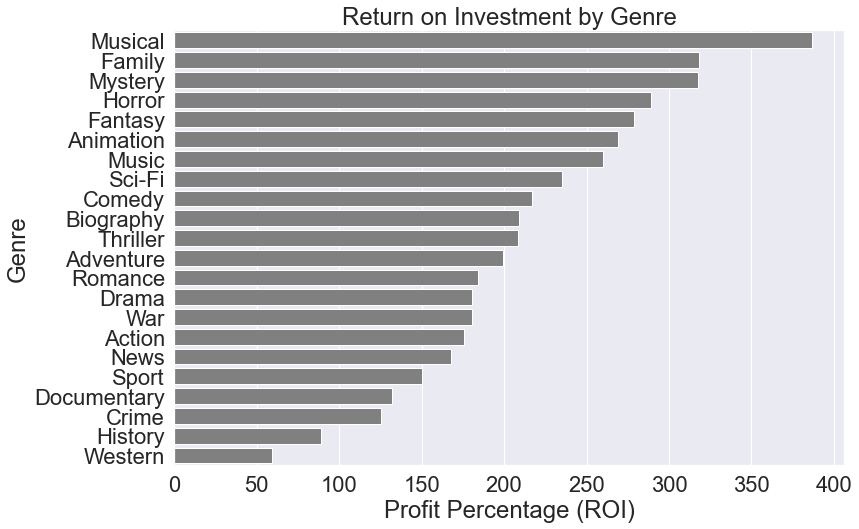

In [30]:
#Create a barplot to show the relationship between genre and average ROI
sns.set(rc={'figure.figsize':(12,8)},
        font_scale=2)
p2 = sns.barplot(data = profits_df, 
                 x='avg_percent', 
                 y=profits_df.index,
                 color='grey')
p2.set(xlabel="Profit Percentage (ROI)", 
       ylabel='Genre', 
       title='Return on Investment by Genre');

### Findings
This graph illustrates that the top 5 genres with the highest return on investment are Musicals, Family, Mystery, Horror, and Fantasy.

## Overall Findings
The genres that appear in the top 5 for both categories are Family, Fantasy, and Musicals.  Animation and Adventure seem to do really well profit wise, but cost more to produce.  Alternately, Horror and Fantasy have a high ROI, but don't seem to do as well at the box office.  It is important to keep in mind that each movie can have up to three different genres.

# Find the Best Month to Release a Movie
Next we will be looking into how the release month effects the revenue generated by a film.  We will be looking at release months for each year since 2010 and will be comparing them to the worldwide gross to get an idea of how profitable each month is.
## Creating and Merging the DataFrames
For this example, we will again be using the imdb title basics table and the tn movie budgets table.

In [31]:
#Create separate DataFrames
title_basics_df = csv_files_dict["imdb_title_basics_gz"]
print("Length:", len(title_basics_df))
title_basics_df.head()

Length: 146144


,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [32]:
movie_budgets_df = csv_files_dict["tn_movie_budgets_gz"]
print("Length:", len(movie_budgets_df))
movie_budgets_df.head()

Length: 5782


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [33]:
#Merge the tables
merged_df = title_basics_df.merge(movie_budgets_df,
                                                 how='inner',
                                                 left_on='primary_title',
                                                 right_on='movie')
merged_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy","Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy","Aug 18, 1995",Mortal Kombat,"$20,000,000","$70,433,227","$122,133,227"
2,The Overnight,The Overnight,2010,88.0,NaN,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
3,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery","Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
4,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance","Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"


## Cleaning the DataFrame
For this example, we want to manipulate the release date column in order to be able to organize our data by month.

In [34]:
#check for duplicates
merged_df.duplicated().value_counts

<bound method IndexOpsMixin.value_counts of 0       False
1       False
2       False
3       False
4       False
        ...  
3810    False
3811    False
3812    False
3813    False
3814    False
Length: 3815, dtype: bool>

In [35]:
#Manipulate release date to only include the month
merged_df['release_date'] = merged_df['release_date'].map(
    lambda x: x.split()[0])
merged_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",Dec,Foodfight!,"$45,000,000",$0,"$73,706"
1,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",Aug,Mortal Kombat,"$20,000,000","$70,433,227","$122,133,227"
2,The Overnight,The Overnight,2010,88.0,NaN,Jun,The Overnight,"$200,000","$1,109,808","$1,165,996"
3,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",Jun,The Overnight,"$200,000","$1,109,808","$1,165,996"
4,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",Mar,On the Road,"$25,000,000","$720,828","$9,313,302"


In [36]:
#Clean worldwide gross and convert it to an integer
merged_df['worldwide_gross'] = merged_df[
    'worldwide_gross'].str.replace("$", "").str.replace(",", "").astype(int)

In [37]:
#Filter the DataFrame to include only needed data
month_and_year_df = merged_df.filter(['release_date', 
                                      'start_year', 
                                      'worldwide_gross'])
month_and_year_df

,release_date,start_year,worldwide_gross
0,Dec,2012,73706
1,Aug,2021,122133227
2,Jun,2010,1165996
3,Jun,2015,1165996
4,Mar,2012,9313302
...,...,...,...
3810,Nov,2018,174255
3811,Apr,2019,12592907
3812,Aug,2015,27882226
3813,Oct,2018,124823094


## Ordering our Data by Month
To organize our data (and our plot) by month, we have to set up a category so that our code knows the correct month order.

In [38]:
#Set up a category to order the months
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_and_year_df['release_date'] = pd.Categorical(
    month_and_year_df['release_date'], categories=months, ordered=True)

In [39]:
month_and_year_df.sort_values('release_date', inplace=True)

## Removing Incomplete Data Samples
In looking through this DataFrame, I found that there is hardly any data from 2020 and 2021.  Because there are so few films in these years, I am choosing to exclude them from our analysis as to not skew our data.

In [40]:
#Remove data from 2020 and 2021
month_and_year_df = month_and_year_df[month_and_year_df['start_year'] < 2020]

## Organize the Data by Year and Month

In [41]:
#Group the data by year and then by month
month_and_year_df = month_and_year_df.groupby(
    ['start_year', 'release_date']).mean()

In [42]:
month_and_year_df

worldwide_gross
start_year release_date                 
2010       Jan              6.022838e+07
           Feb              8.478351e+07
           Mar              1.535752e+08
           Apr              4.391501e+07
           May              9.206926e+07
...                                  ...
2019       Aug              3.244294e+07
           Sep              2.648121e+07
           Oct              2.896269e+07
           Nov              1.531752e+08
           Dec              4.348002e+07

[120 rows x 1 columns]

### Representing our Data in a Plot
We will use a line plot to represent our findings.

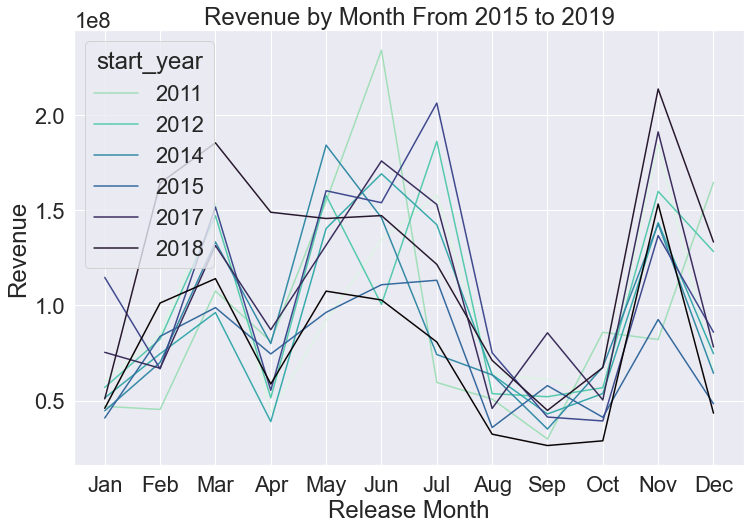

In [43]:
#Create a line plot to showcase results
sns.set(rc={'figure.figsize':(12,8)},
        font_scale=2)
p3 = sns.lineplot(data=month_and_year_df, 
                  x='release_date', 
                  y='worldwide_gross', 
                  hue='start_year',
                  palette = 'mako_r')
p3.set(xlabel='Release Month',
       ylabel='Revenue',
       title='Revenue by Month From 2015 to 2019');

## Findings
Based on the above graph, it seems as though the worst months to release a movie would be January, April, August, September, October, and December.  Conversely, the best months to release movies are May, June, July, and November.

# Find the Director with the Highest Ratings
Finally, we are going to look into the fifteen highest rated directors that have produced 10 or more movies.
## Choosing our Data
For the final example, we will be using four tables: imdb title crew, imdb title ratings, imdb title principals, and imdb name basics.

In [44]:
#Create separate DataFrames
movie_crew_df = csv_files_dict["imdb_title_crew_gz"]
print("Length:", len(movie_crew_df))
movie_crew_df.head()

Length: 146144


,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0438973,NaN,"nm0175726,nm1802864"
tt0462036,nm1940585,nm1940585
tt0835418,nm0151540,"nm0310087,nm0841532"
tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [45]:
movie_ratings_df = csv_files_dict["imdb_title_ratings_gz"]
print("Length:", len(movie_ratings_df))
movie_ratings_df.head()

Length: 73856


,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [46]:
title_principals_df = csv_files_dict["imdb_title_principals_gz"]
print("Length:", len(title_principals_df))
title_principals_df.head()

Length: 1028186


,ordering,nconst,category,job,characters
tconst,,,,,
tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
tt0111414,2,nm0398271,director,NaN,NaN
tt0111414,3,nm3739909,producer,producer,NaN
tt0323808,10,nm0059247,editor,NaN,NaN
tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [47]:
name_basics_df = csv_files_dict["imdb_name_basics_gz"]
print("Length:", len(name_basics_df))
name_basics_df.head()

Length: 606648


,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


## Joining the Tables
In this case, we are able to join three of the tables on their index.  The fourth, name basics, must be added via a merge because we are using columns that are not the index.

In [48]:
#Join crew, ratings, and principals on index
crew_and_ratings_df = movie_crew_df.join(movie_ratings_df, how='inner')
join_principals_df = crew_and_ratings_df.join(title_principals_df, 
                                              how='inner')

In [49]:
#Merge in names on nconst
names_merged_df = join_principals_df.merge(name_basics_df, 
                                           how='inner', 
                                           left_on='nconst', 
                                           right_on='nconst')

## Cleaning the Data
From these merged tables, we want to pull only the (living) directors and put them in their own DataFrame.

In [50]:
#check for duplicates
names_merged_df.duplicated().value_counts

<bound method IndexOpsMixin.value_counts of 0         False
1         False
2         False
3         False
4         False
          ...  
629593    False
629594    False
629595    False
629596    False
629597    False
Length: 629598, dtype: bool>

In [51]:
#Look at categories
names_merged_df['category'].value_counts()

actor                  155476
actress                 92824
producer                80367
director                77452
writer                  52412
composer                49898
cinematographer         46652
self                    32906
editor                  32428
production_designer      7038
archive_footage          2133
archive_sound              12
Name: category, dtype: int64

In [52]:
#Create a DataFrame of directors
directors_df = names_merged_df[names_merged_df['category'] == 'director']

In [53]:
directors_df

,directors,writers,averagerating,numvotes,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
5,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",7.0,77,5,nm0712540,director,NaN,NaN,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer","tt0266757,tt0266712,tt0134996,tt0266765"
25,nm0002411,NaN,7.2,43,5,nm0002411,director,NaN,NaN,Mani Kaul,1944.0,2011.0,"director,writer,actor","tt0102515,tt0070009,tt0066514,tt0207626"
35,nm0000953,"nm0091673,nm0000953",6.1,22179,5,nm0000953,director,NaN,NaN,Peter Bogdanovich,1939.0,NaN,"actor,director,writer","tt0067328,tt0063671,tt0070510,tt0069049"
54,nm0000080,"nm0000080,nm0462648",6.9,4517,5,nm0000080,director,NaN,NaN,Orson Welles,1915.0,1985.0,"actor,director,writer","tt0048393,tt0052311,tt0057427,tt0033467"
98,nm0611531,nm0347899,6.1,13,5,nm0611531,director,NaN,NaN,Hrishikesh Mukherjee,1922.0,2006.0,"director,editor,writer","tt0066763,tt0147855,tt0137362,tt0137361"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629572,nm10536332,"nm10536332,nm3853626",6.1,7,5,nm10536332,director,NaN,NaN,Maria Salazar,NaN,NaN,NaN,NaN
629577,nm10536451,"nm10536451,nm10536453,nm10536454",8.4,365,5,nm10536451,director,NaN,NaN,Vineesh Aaradya,NaN,NaN,"writer,director",NaN
629582,nm1502645,NaN,6.2,5,1,nm1502645,director,NaN,NaN,Sarah Christman,NaN,NaN,"miscellaneous,director,editor","tt10012842,tt3118730,tt0398932,tt9913056"
629594,nm1716653,"nm3678448,nm9361716",6.6,5,5,nm1716653,director,NaN,NaN,Laura Jou,NaN,NaN,"miscellaneous,actress,director","tt1164999,tt0464141,tt5151924,tt1649419"


In [54]:
#Remove directors if they have died
directors_df = directors_df[directors_df['death_year'].isna() == True]

## Pulling Relevant Data
Since we are wanting the best directors, not one hit wonders, we will be looking only at directors who have filmed more than 10 movies.

In [55]:
#Create a DataFrame of directors with more than 10 movies
top_directors = pd.DataFrame(
    directors_df['primary_name'].value_counts()[:163])

In [56]:
#Merge to keep only directors with 10+ movies
top_directors_df = directors_df.merge(top_directors, 
                                      how='inner', 
                                      left_on='primary_name', 
                                      right_on=top_directors.index)

In [57]:
#Groupby director to get the average of their average rating
top_directors_df = top_directors_df.groupby('primary_name').mean()

In [58]:
#Sort by rating
top_15_directors_df = top_directors_df.sort_values('averagerating', 
                                                   ascending=False)[:15]

## Representing our Data in a Plot
We will use a bar plot to represent our findings.

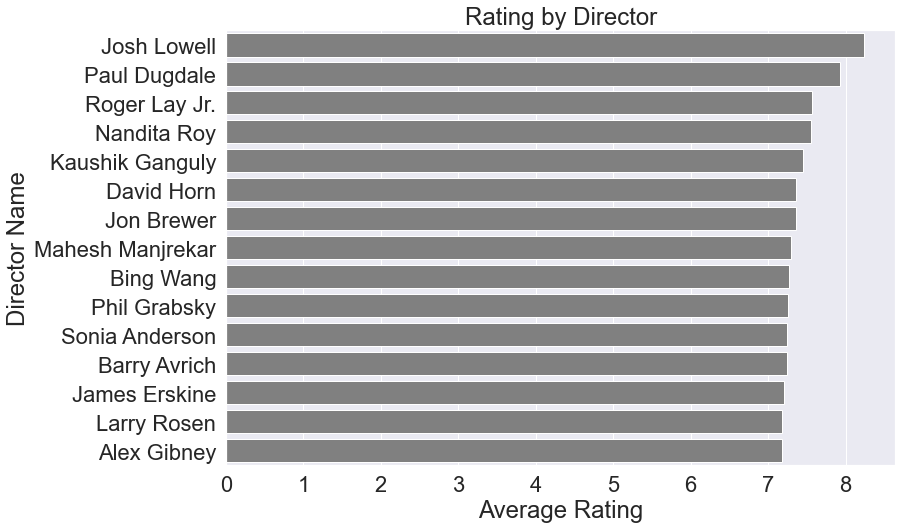

In [59]:
#Create a bar plot to showcase results
sns.set(rc={'figure.figsize':(12,8)},
        font_scale=2)
p = sns.barplot(data=top_15_directors_df, 
                x='averagerating', 
                y=top_15_directors_df.index,
                color='grey')
p.set(xlabel='Average Rating', 
      ylabel='Director Name', 
      title='Rating by Director');

## Findings
Of the directors that have produced ten of more movies, the top fifteen highest rated are all fairly close together.  

# Suggestions to Microsoft

## Choosing a Genre
Based off of our findings, I would recommend producing a Family or Fantasy movie.  They both do very well as far as profits and ROI.  The only reason I would not recommend a Musical is because they seem to have high stats due to Disney.

## Scheduling a Release Date
I would recommend releasing a movie in either June, July, or November.  Historically, movies seem to do the best when released in these months.  If Microsoft decides to make a Family film, I would suggest releasing in the summer when children are out of school.

## Hiring a Director
Microsoft really can't go wrong with any or the top 15 directors that we found in our last example.  They are all very close in average ratings.

# Next Steps
1. I would look into the highest grossing production companies and find the genres that they tend to lean towards.
2. Looking closer into release date, it would be important to establish the number of films released in each month vs average gross revenue.  If significantly more movies are released in June, July, and November, then it might not be as important that those are the top grossing months.
3. It would be interested to dive into the genre that each of the top fifteen directors specializes in and see how they relate to the first two graphs we created.